# Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 5/HW/air-traffic-passenger-statistics.csv')

## EDA

In [ ]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
968,200603,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,8161
18053,201801,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Deplaned,Low Fare,Terminal 1,B,149105
17105,201707,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Other,International,A,13556
3648,200802,Lufthansa German Airlines,LH,Lufthansa German Airlines,LH,International,Europe,Deplaned,Other,International,G,15688
2199,200702,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Enplaned,Other,International,G,4966


In [ ]:
df[df['GEO Summary']==df['Terminal']].shape

(10548, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


her Operating Airline in bir tane Operating Airline IATA Code var

her Published Airline in bir tane Published Airline IATA Code var





In [ ]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

## Data Visualization

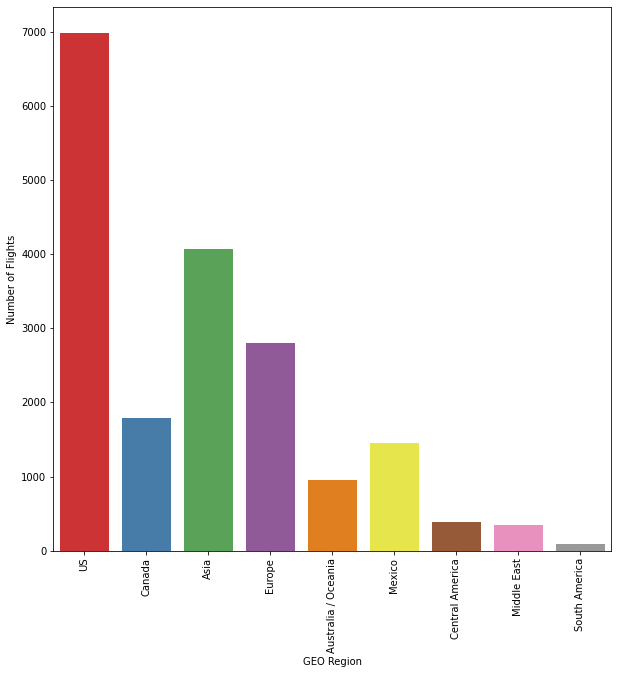

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='GEO Region', palette='Set1', data=df)
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

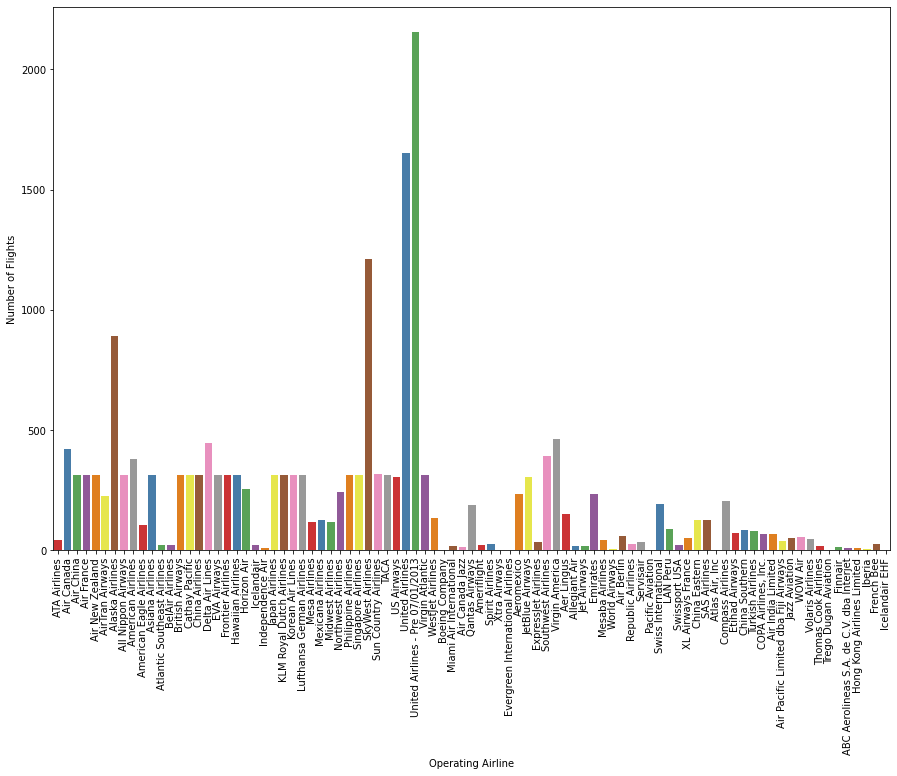

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Operating Airline', palette='Set1', data=df)
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

## Clustering

In [ ]:
flight_count = df['Operating Airline'].value_counts()
flight_count.sort_index(inplace=True)
data=pd.DataFrame() # Create empty dataframe
data['Flight Count'] = flight_count.values
data['Airplane'] = flight_count.index.values
passenger_count = df.groupby('Operating Airline').sum()['Passenger Count']
passenger_count.sort_index(inplace=True)
data['Passenger Count'] = passenger_count.values

In [ ]:
def cluster(x,clusters):
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for i in np.arange(1,clusters):
        i+=1
        model=KMeans(n_clusters=i)
        pred=model.fit_predict(x)
        score=silhouette_score(x,pred)
        print("Number of cluster = {}, silhoutte = {}, inertia = {}".format(i, score, model.inertia_))
        allscore.append(score)
        allclusters.append(i)
        sum_of_squared_distances.append(model.inertia_)
        
    plt.figure(figsize=(10,10))
    plt.plot(allclusters,sum_of_squared_distances,marker='x',c='b');
    

Number of cluster = 2, silhoutte = 0.9286008999043343, inertia = 7442149611074470.0
Number of cluster = 3, silhoutte = 0.9124445056983075, inertia = 989647640265631.0
Number of cluster = 4, silhoutte = 0.8270891141738362, inertia = 405396399669552.7
Number of cluster = 5, silhoutte = 0.7267852090532811, inertia = 226148970063133.16
Number of cluster = 6, silhoutte = 0.7269693507973984, inertia = 134383196921059.38
Number of cluster = 7, silhoutte = 0.7242496134794826, inertia = 87720106884814.36
Number of cluster = 8, silhoutte = 0.7372228603872746, inertia = 59129415822398.03
Number of cluster = 9, silhoutte = 0.7192917541572154, inertia = 32598968087448.656
Number of cluster = 10, silhoutte = 0.7107647583653071, inertia = 23326095924900.33


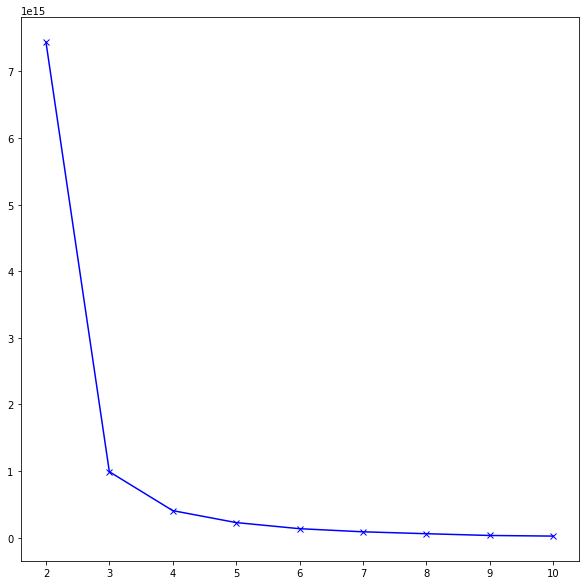

In [ ]:
cluster(data[['Flight Count','Passenger Count']],10)

In [ ]:
model=KMeans(n_clusters=6)
pred=model.fit_predict(data[['Flight Count','Passenger Count']])
data['Cluster']=pred

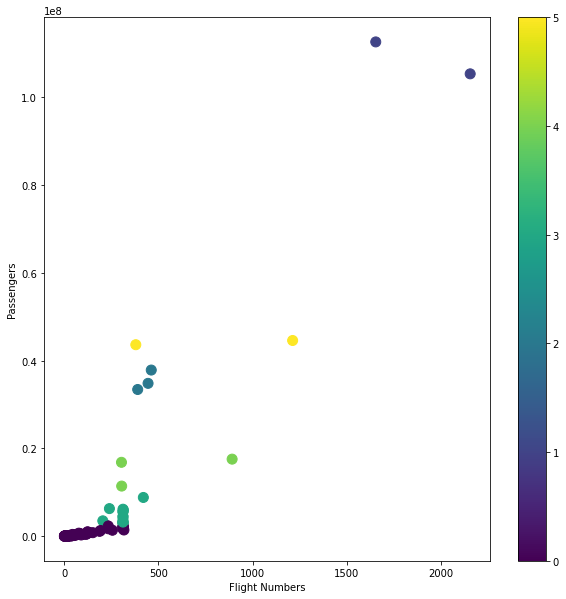

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Flight Numbers')
plt.ylabel('Passengers')
plt.scatter(data['Flight Count'], data['Passenger Count'], c=pred, s=100)
plt.colorbar()
plt.show()

In [ ]:
data.sample(20)

,Flight Count,Airplane,Passenger Count,Cluster
12,226,AirTran Airways,2388648,0
50,305,JetBlue Airways,11398739,4
85,135,WestJet Airlines,799801,0
86,3,World Airways,785,0
53,90,LAN Peru,250741,0
71,317,Sun Country Airlines,1389930,0
32,312,EVA Airways,4387370,3
77,78,Turkish Airlines,668285,0
47,313,Japan Airlines,2008088,0
23,1,Boeing Company,18,0
